In [1]:
#Import library yang dibutuhkan untuk klasifikasi naive bayes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns 

In [2]:
## untuk melihat data yang sudah kita import meliputi baris dan kolom
dataset = pd.read_csv('/kaggle/input/datapesawat/Jan_2019_ontime.csv')
dataset.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [3]:
#menghapus kolom yang tidak kita gunakan
df = dataset.drop(columns=['DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER',
                           'OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM',
                           'OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID',
                           'DEP_TIME_BLK','ARR_TIME','CANCELLED','DIVERTED','DISTANCE'])
data = df.head(350)
data.head()

,ORIGIN,DEST,DEP_TIME,DEP_DEL15,ARR_DEL15
0,GNV,ATL,601.0,0.0,0.0
1,MSP,CVG,1359.0,0.0,0.0
2,DTW,CVG,1215.0,0.0,0.0
3,TLH,ATL,1521.0,0.0,0.0
4,ATL,FSM,1847.0,0.0,0.0


In [4]:
#mendeklarasikan jumlah variabel x dan y
X = data.iloc[:, :4].values
Y = data.iloc[:, 4].values

In [5]:
#mengubah data kategorikal menjadi numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])

In [6]:
#mencetak data yang sudah diubah
print(X)

[[38 4 601.0 0.0]
 [68 23 1359.0 0.0]
 [30 23 1215.0 0.0]
 ...
 [42 27 2055.0 0.0]
 [13 27 1132.0 0.0]
 [74 11 1326.0 0.0]]


In [7]:
#Split data menjadi tseparate training dan test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

print(x_test)

[[49 4 1553.0 0.0]
 [49 4 727.0 0.0]
 [20 63 917.0 0.0]
 [4 8 854.0 0.0]
 [77 74 552.0 0.0]
 [17 4 1415.0 0.0]
 [51 14 1609.0 0.0]
 [23 4 1202.0 0.0]
 [25 68 651.0 0.0]
 [20 68 1300.0 0.0]
 [74 54 1558.0 0.0]
 [68 67 1325.0 0.0]
 [28 91 1838.0 0.0]
 [99 4 1330.0 0.0]
 [4 38 2219.0 0.0]
 [4 21 1054.0 0.0]
 [80 11 919.0 0.0]
 [72 58 2331.0 1.0]
 [68 51 956.0 0.0]
 [64 10 1527.0 0.0]
 [89 27 803.0 0.0]
 [77 11 1902.0 0.0]
 [4 2 2230.0 0.0]
 [51 81 2153.0 0.0]
 [4 42 1011.0 0.0]
 [35 4 1332.0 0.0]
 [51 83 1450.0 0.0]
 [68 43 1936.0 0.0]
 [33 29 824.0 0.0]
 [24 68 1325.0 0.0]
 [4 101 1742.0 0.0]
 [14 4 1049.0 0.0]
 [79 4 1353.0 0.0]
 [4 90 949.0 0.0]
 [24 68 817.0 1.0]
 [19 68 1051.0 0.0]
 [4 50 2117.0 0.0]
 [43 68 1605.0 1.0]
 [4 6 912.0 0.0]
 [59 4 1523.0 0.0]
 [20 42 2104.0 1.0]
 [4 95 1615.0 0.0]
 [51 94 953.0 0.0]
 [20 66 2114.0 0.0]
 [77 11 2122.0 0.0]
 [32 4 605.0 0.0]
 [4 70 1030.0 0.0]
 [58 18 954.0 0.0]
 [19 54 1556.0 0.0]
 [30 31 822.0 0.0]
 [4 95 937.0 0.0]
 [74 11 1326.0 0.0]
 

In [8]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

print(x_train)

[[ 0.99511432 -0.5360873  -0.48309389 -0.38411064]
 [ 0.75158528  1.2089074   0.66068783 -0.38411064]
 [ 0.75158528 -0.43138762 -1.13507202 -0.38411064]
 ...
 [-1.33580648  0.16191058 -0.6929     -0.38411064]
 [-0.43127005 -1.23408518 -0.21914426 -0.38411064]
 [ 0.36889679 -0.46628751 -1.61108374 -0.38411064]]


In [9]:
#Model training
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [10]:
#Predictthe result data tes
y_pred = classifier.predict(x_test)

print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
#Cek nilai akurasi
from sklearn.metrics import confusion_matrix,accuracy_score

ac = accuracy_score(y_test, y_pred)

ac

0.9714285714285714

In [12]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[64  1]
 [ 1  4]]

True Positives(TP) =  64

True Negatives(TN) =  4

False Positives(FP) =  1

False Negatives(FN) =  1


<AxesSubplot:>

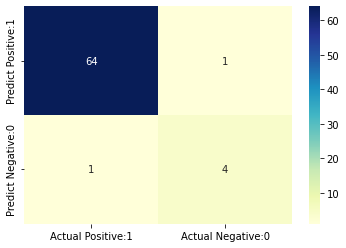

In [13]:
#Classification matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')